Import Libraries


In [30]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



Define paths and parameters

In [3]:

# Adjust this path according to your local system
DATADIR = r"C:\Users\training_set\training_set"
CATEGORIES = ["cats", "dogs"]
IMG_SIZE = 100  # Resize all images to 100x100


Load and Preprocess Images

In [56]:
data = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)  # 0 for cats, 1 for dogs

    for img in tqdm(os.listdir(path)[:1000]):  # Limiting to 1000 images per category
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

            resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized_array, class_num])
        except Exception as e:
            pass


100%|██████████| 1000/1000 [00:03<00:00, 256.63it/s]


Shuffle and Separate Features/Labels

In [12]:
import random
random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE * IMG_SIZE)  # Flatten for SVM input
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the SVM model

In [14]:
model = SVC(kernel='linear')  # or try 'rbf'/'poly'
model.fit(X_train, y_train)


SVC(kernel='linear')

Evaluate the model

In [18]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5225

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.60      0.54       188
           1       0.56      0.45      0.50       212

    accuracy                           0.52       400
   macro avg       0.53      0.53      0.52       400
weighted avg       0.53      0.52      0.52       400



Predict and visualize a few results

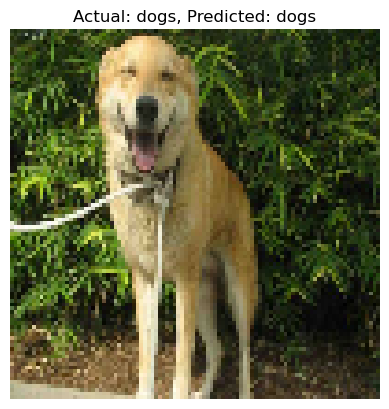

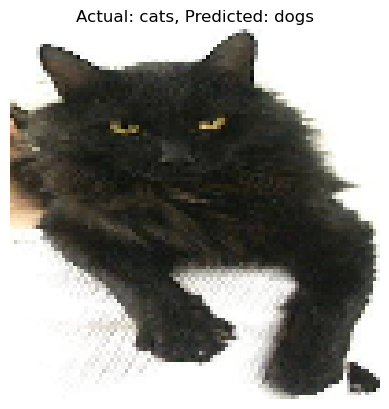

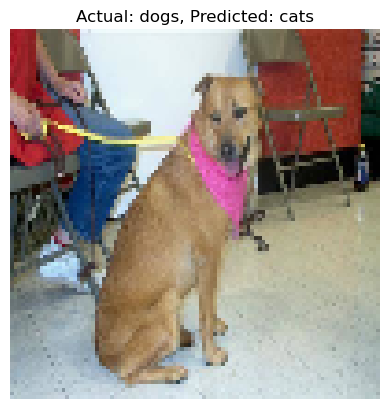

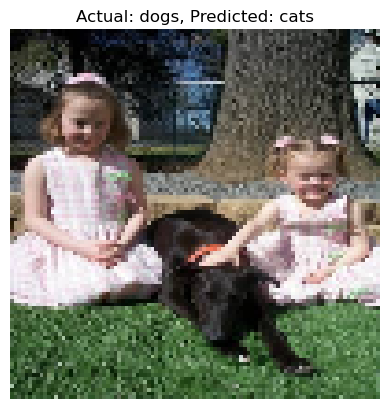

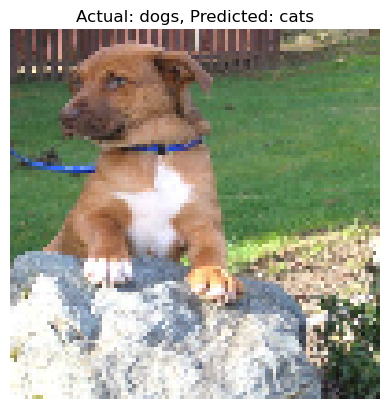

In [80]:
for i in range(5):
    img = X_test[i]  # Should be shape (IMG_SIZE, IMG_SIZE, 3)
    plt.imshow(img)
 # Convert to displayable format
    plt.title(f"Actual: {CATEGORIES[y_test[i]]}, Predicted: {CATEGORIES[y_pred[i]]}")
    plt.axis('off')
    plt.show()



 Evaluate the Model

In [ ]:
# Evaluation
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.56      0.51       185
           1       0.54      0.45      0.49       215

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.51      0.50      0.50       400



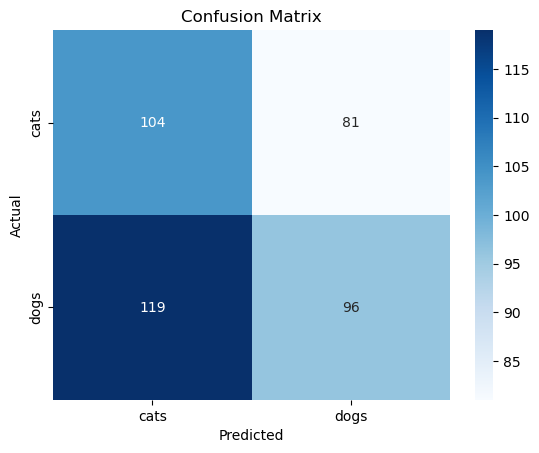

In [39]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

Show a Sample Prediction

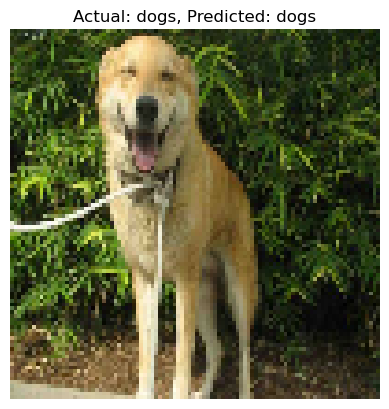

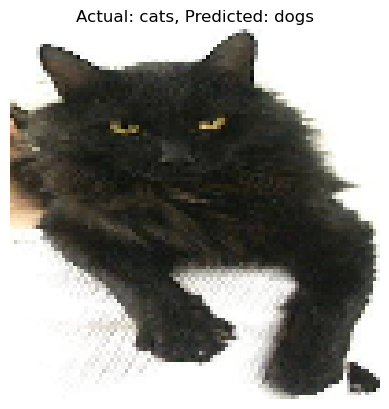

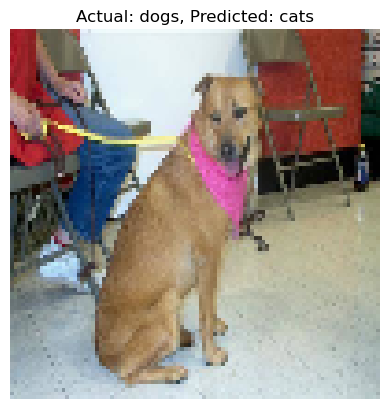

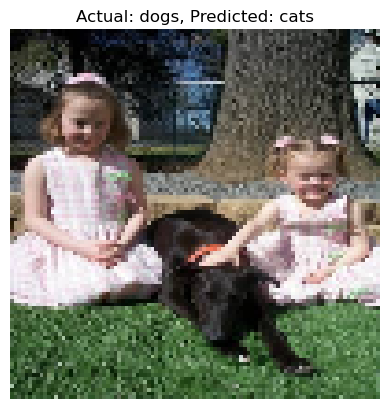

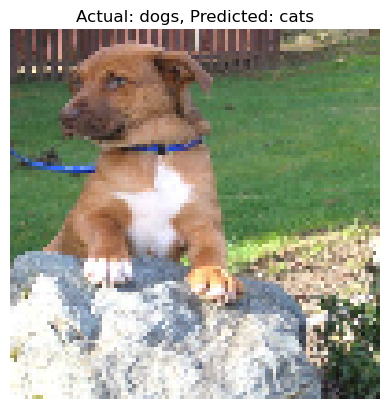

In [70]:
import matplotlib.pyplot as plt

for i in range(5):
    img = X_test[i]  # shape (100, 100, 3)
    plt.imshow(img)  # this works for color images
    plt.title(f"Actual: {CATEGORIES[y_test[i]]}, Predicted: {CATEGORIES[y_pred[i]]}")
    plt.axis('off')
    plt.show()


Insights and Conclusion